<a href="https://colab.research.google.com/github/1dgog/TC3006C_portafolio_m2/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
from google.colab import drive
drive.mount("/content/gdrive")
!pwd
#put your own path in google drive
%cd "/content/gdrive/MyDrive"
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive
/content/gdrive/MyDrive
'Colab Notebooks'	 iris.data	    'Sin ordenar'
 curriculum.pdf		 iris.names	     test.csv
'Documentos utiles'	 LiFE		     train.csv
 EBSCO			'Plan de estudios'   Valhalla23.csv
 EGSGLP			 PlayDataset.csv     wine.data
 Fotos			 Portugues	     wine.names
 gender_submission.csv	'Servicio Social'


Se importan las librerias para análisis de datos y visualización de datos

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análisis de la base de datos

Se importan los datasets

In [200]:
df_train = pd.read_csv('train.csv', names = ["PassengerId","Survived","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"])
df_train = df_train.iloc[1: , :]
df_train.head
df_train.shape
df_gender = pd.read_csv('gender_submission.csv',names = ["PassengerId","Survived"])
df_gender = df_gender.iloc[1: , :]
df_gender.head
df_gender.shape
df_test = pd.read_csv('test.csv',names = ["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"])
df_test = df_test.iloc[1: , :]
df_test.head
df_test.shape
df_train
df_test
df_gender

,PassengerId,Survived
1,892,0
2,893,1
3,894,0
4,895,0
5,896,1
...,...,...
414,1305,0
415,1306,1
416,1307,0
417,1308,0


¿Cuantos NaNs hay por columna?

In [183]:
x = {}
for ii in df_train:
  x[ii] = df_train[ii].isnull().sum().sum()
print(x)

{'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Name': 0, 'Sex': 0, 'Age': 177, 'SibSp': 0, 'Parch': 0, 'Ticket': 0, 'Fare': 0, 'Cabin': 687, 'Embarked': 2}


De esto se interpreta que no es apropiado eliminar los renglones con NaNs en su totalidad, puesto que la columna Fare tiene 687 datos Null, y por ende el número total de datos bajaría de eliminar estos renglones. Por lo anterior, se aplica drop a la columna Fare, pues no presenta relevancia.

In [185]:
df_train = df_train.drop(columns = "Cabin")

In [186]:
df_train = df_train.dropna()

Se hace un scatter para observar la distribución de datos de 

([], <a list of 0 Text major ticklabel objects>)

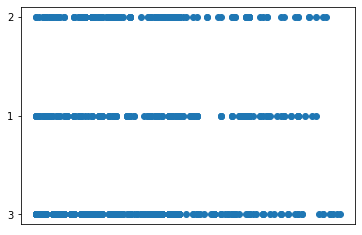

In [187]:
plt.scatter(df_train["Age"],df_train["Pclass"])
plt.xticks(range(100, 5))

De este histograma se encuentra que se tiene un ligero sesgo hacia la derecha en las edades

(array([125., 102., 117.,  76., 132.,  31.,  43.,  44.,  29.,  13.]),
 array([ 0. ,  8.7, 17.4, 26.1, 34.8, 43.5, 52.2, 60.9, 69.6, 78.3, 87. ]),
 <a list of 10 Patch objects>)

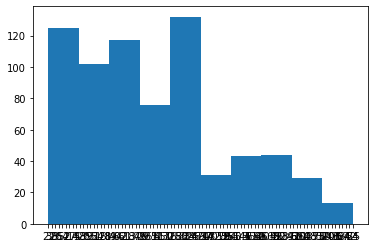

In [188]:
plt.hist(df_train["Age"])

Se observa que la tercera clase es la que más datos tiene

(array([355.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 173.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

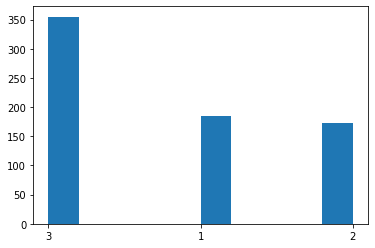

In [189]:
plt.hist(df_train["Pclass"])

Hubieron más fallecidos que sobrevivientes.

(array([424.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 288.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

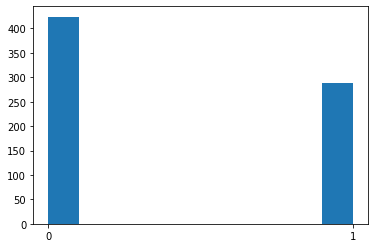

In [190]:
plt.hist(df_train["Survived"])

Se explora sobrevivientes en grupo o solos

In [193]:
sns.barplot('SibSp','Survived',data = df_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


TypeError: ignored

# Machine learning con librerias

Dado que estados resultantes de las predicciones son solo vivo y muerto, se considera que un clasificador binario como regresión logistica podría ser útil.

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [203]:
logit = LogisticRegression()
X = df_train[['Age']]
y = df_train[['Survived']]
logit.fit(X,y)

In [196]:
df_test = df_test.dropna()
predictions = logit.predict(df_test[['Age']])

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0'], dtype=object)

In [202]:
accuracy_score(df_gender[1], predictions)

KeyError: ignored